### 1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

#deimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#clasifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model selection
from sklearn.model_selection import RandomizedSearchCV

#matrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


### 2. Loading the Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


### 3. Data Preprocessing

3.a. Checking duplicates 

In [5]:
print("duplicates in training data: ", sum( train.duplicated() ) )
print("duplicates in test data: ", sum( test.duplicated() ) )


duplicates in training data:  0
duplicates in test data:  0


3.b. Checking of missing values

In [6]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
train.isna().sum().sum()

0

In [8]:
test.isna().sum().sum()

0

3.c. Checking for Frequency Count of each activity class

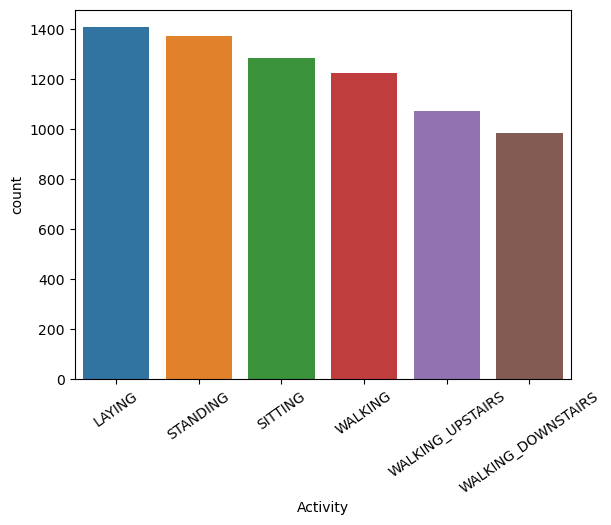

In [9]:
sns.countplot(x= train.Activity ,order = train.Activity.value_counts().index )
plt.xticks(rotation=35)
plt.show()

The data column has almost same frequency for each Activity, so the data doesn't have a class imbalance problem

- Techniques for class imbalance:

1. Random oversampling: Duplicating the data of minority class
2. using class weights e.g
- from sklearn.ensemble import RandomForestClassifier
- model = RandomForestClassifier(class_weight='balanced')
- model.fit(X_train, y_train)

### 4. Exploratory Data Analysis

4.a. What features are there?

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
"tBodyAcc-mean()-X".split('-')

['tBodyAcc', 'mean()', 'X']

In [12]:
"tBodyAcc-mean()-X".split('-')[0]

'tBodyAcc'

In [13]:
A= [i.split('-')[0].split('(')[0] for i in train.columns]
print(len(A))
A

563


['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [14]:
Counter(A)

Counter({'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [15]:
pd.DataFrame.from_dict(Counter(A), orient='index').rename(columns = {0:'count'}).sort_values('count')

,count
Activity,1
subject,1
angle,7
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13
fBodyBodyAccJerkMag,13
fBodyAccMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13
tGravityAccMag,13


4.b. Analysing tBodyAccMag-mean feature

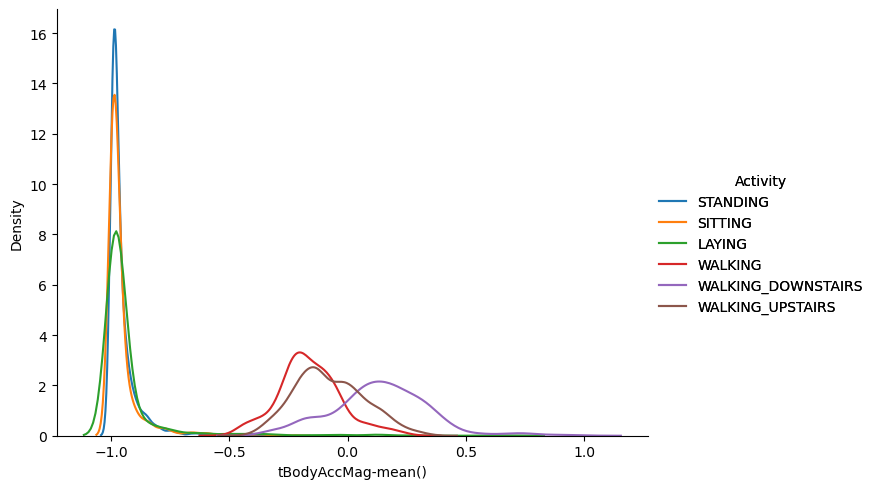

In [16]:
# Facetgrid orbject
g = sns.FacetGrid(train, hue='Activity', height=5)

# Map a plot to each facet
g.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()
g.add_legend()

plt.show()

- standing, sitting, laying are static activities

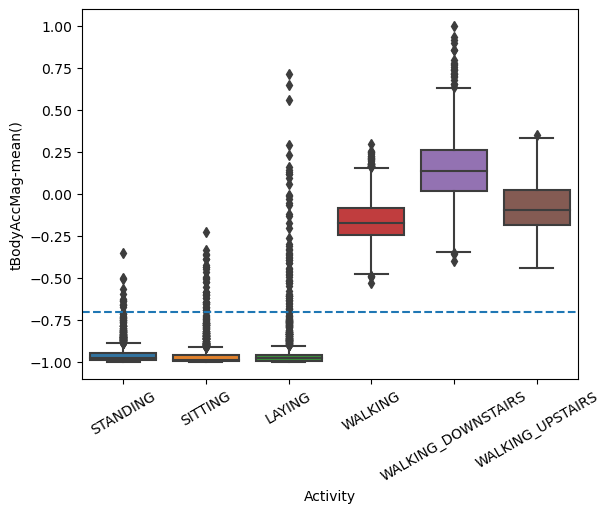

In [17]:
# Boxplot
sns.boxplot(data=train, x="Activity", y="tBodyAccMag-mean()")
plt.xticks(rotation=30)
plt.axhline(y=-0.7, linestyle='--', xmin=0)

4.c. Understanding body x-axis and gravity

In [18]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


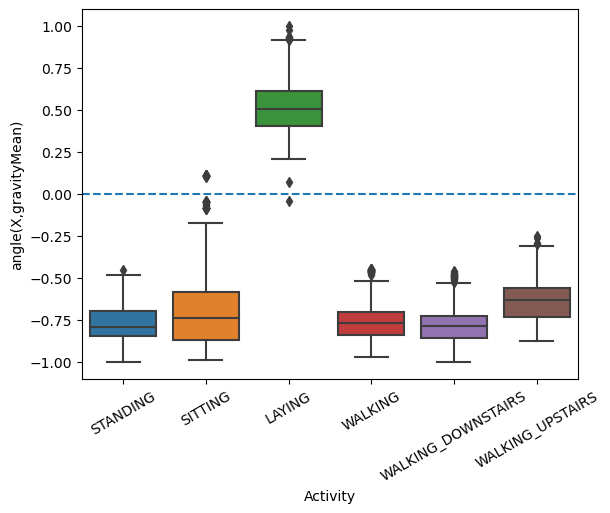

In [19]:
#Boxplot
sns.boxplot(data=train, x="Activity", y="angle(X,gravityMean)")
plt.xticks(rotation=30)
plt.axhline(y= 0, linestyle='--', xmin=0)

x gravity mean easily detects laying 

4.d. Understanding body x-axis and gravity

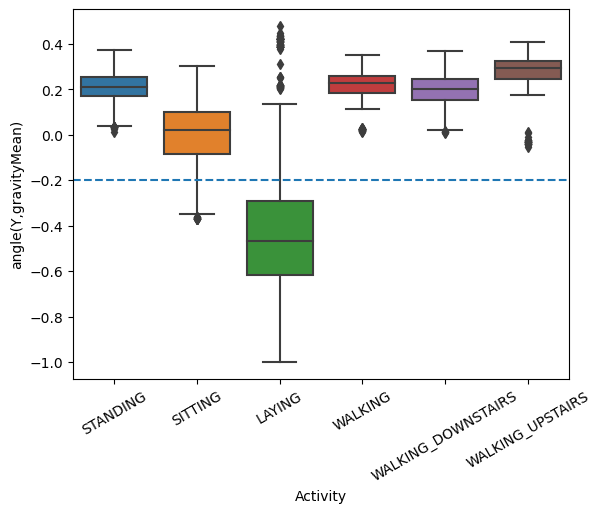

In [20]:
#Boxplot
sns.boxplot(data=train, x="Activity", y="angle(Y,gravityMean)")
plt.xticks(rotation=30)
plt.axhline(y= -0.2, linestyle='--', xmin=0)

Y gravity also clearly distinguishes 

#### 4.e Visualising data using PCA (Principal Component Analysis)
- 561 unique features(563 - subject - activity)
- Using PCA data can be visualized to a low dimensional space and still it retains a lot of information

In [21]:
x_for_pca = train.drop(['Activity', 'subject'], axis=1)

In [22]:
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

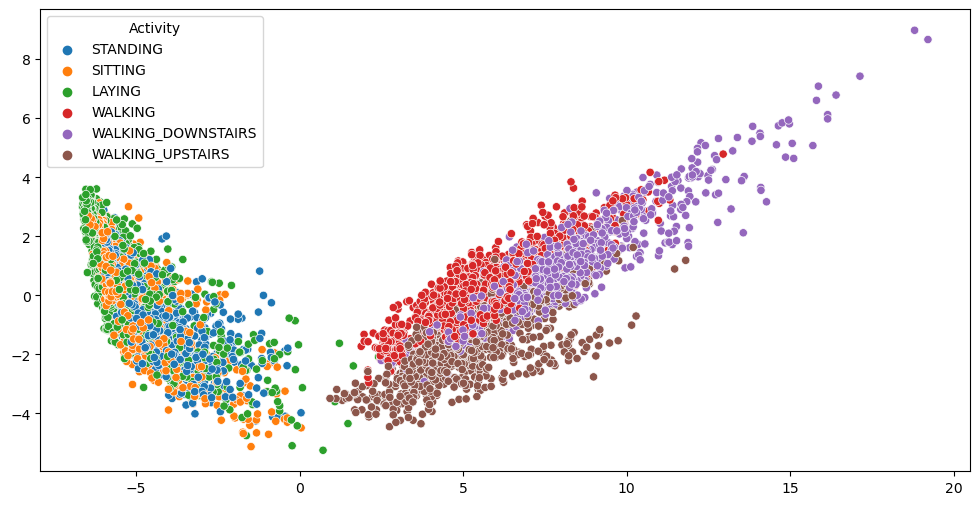

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= pca[:, 0], y= pca[:,1], hue=train.Activity)
plt.show()

#### 4.f. Visualizing data using t-SNE (t-Distributed Stochastic Neighbor Embedding)


In [24]:
x_for_tsne = train.drop(['Activity', 'subject'], axis=1)
tsne = TSNE(n_components =2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [25]:
tsne

array([[ -6.5846224, -62.56863  ],
       [-26.474825 , -17.497314 ],
       [-28.395891 , -20.305143 ],
       ...,
       [ 23.191902 , -61.020435 ],
       [ 23.180101 , -60.762993 ],
       [ 23.685352 , -60.009796 ]], dtype=float32)

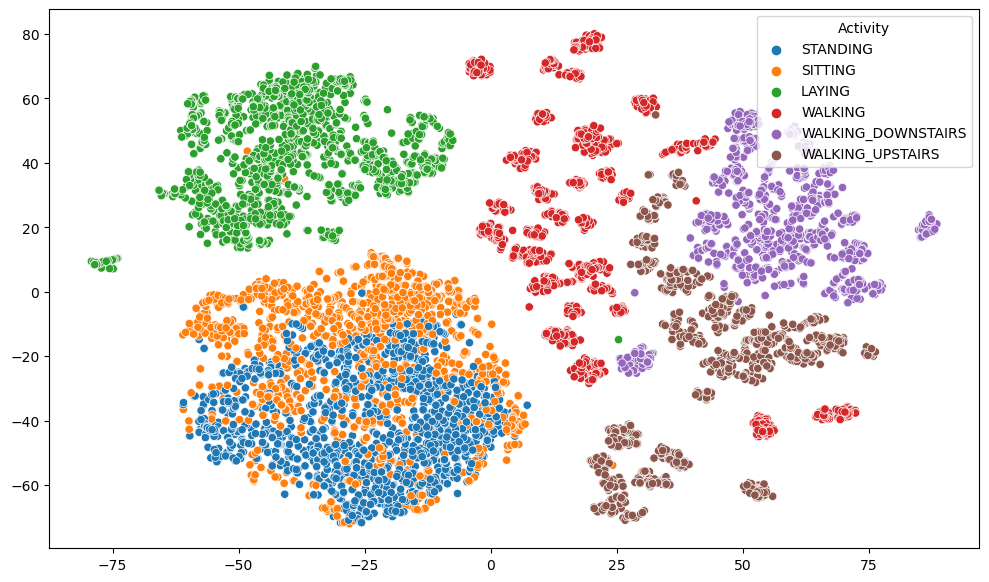

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x= tsne[:, 0], y= tsne[:,1], hue=train.Activity)
plt.show()

## 5. ML Models

### Getting training and test data ready

In [27]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity']

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']

In [28]:
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(999, 561)


### 5.a. LogisticRegression Model with Hyperparameter and Cross validation

In [29]:
lr_classifier = LogisticRegression()

# normal approach
# lr_classifier.fit(X_train, y_train)

# hyperparameter
# Defining the parameter grid
parameters = {'max_iter': [100, 200, 500]}

# adding cross validation
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv=5, random_state=0)
# train model by passing different batches of data, cross verifying 5 times here


lr_classifier_rs.fit(X_train, y_train)

y_prediction = lr_classifier_rs.predict(X_test)

In [30]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_prediction)
print("Accuracy using LogisticRegressionClassifier: ", lr_accuracy)

Accuracy using LogisticRegressionClassifier:  0.955955955955956


In [31]:
cm = confusion_matrix(y_test.values, y_prediction)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]])

<Axes: >

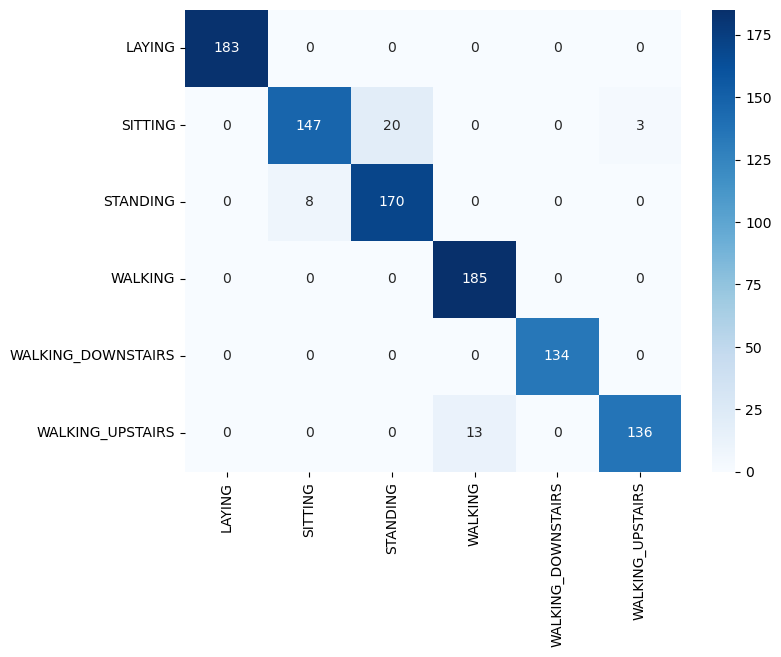

In [32]:


plt.figure(figsize=(8, 6))

Activity_labels = np.unique(y_prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Activity_labels, 
            yticklabels=Activity_labels)


In [33]:
print("Best estimator: ", lr_classifier_rs.best_estimator_)
print("Best set of paramaters: ", lr_classifier_rs.best_params_)

Best estimator:  LogisticRegression(max_iter=200)
Best set of paramaters:  {'max_iter': 200}


### 5.b. SVM Model with Hyperparameter tuning and Cross Validation

In [34]:
# parameters grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm = SVC()

svm_rs = RandomizedSearchCV(svm, param_distributions=parameters, cv=3, random_state=0)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=0)

In [35]:
y_prediction = svm_rs.predict(X_test)

In [36]:
# accuracy score
svm_accuracy = accuracy_score(y_true=y_test, y_pred = y_prediction)
print(svm_accuracy)

0.965965965965966


In [37]:
# confusion matrix for looking at model prediction
cm_svm = confusion_matrix(y_test.values, y_prediction)
cm_svm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   7, 171,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]])

<Axes: >

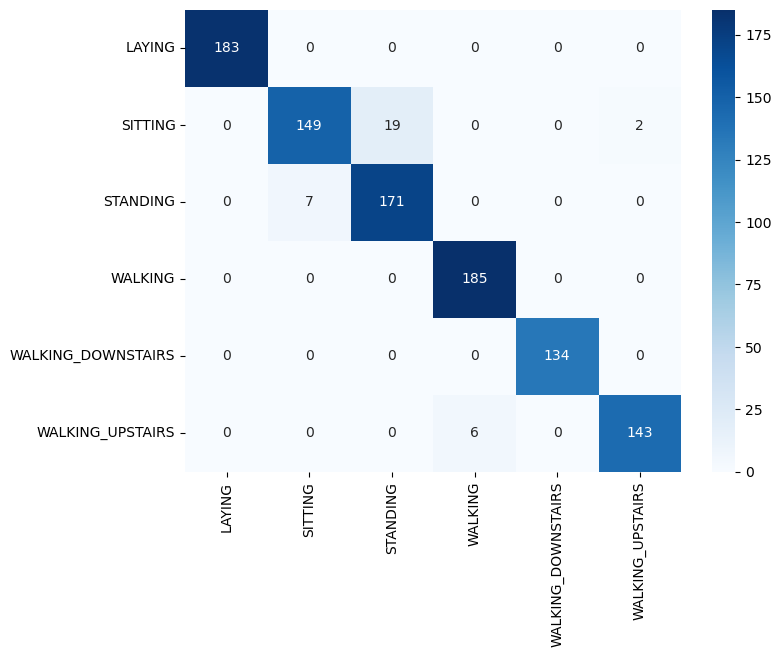

In [38]:
# sns heatmap
plt.figure(figsize=(8, 6))

Activity_labels = np.unique(y_prediction)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=Activity_labels, 
            yticklabels=Activity_labels)


In [39]:
print("Best estimator: ", svm_rs.best_estimator_)
print("Best set of paramaters: ", svm_rs.best_params_)

Best estimator:  SVC(C=50)
Best set of paramaters:  {'kernel': 'rbf', 'C': 50}


### 5.c. Decision tree model with Hyperparameter Tuning and Cross Validation

In [40]:
dtc = DecisionTreeClassifier()

# parameter
param_grid = {
   'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random']
    
}

dtc_rs = RandomizedSearchCV(dtc, param_distributions= param_grid, cv=3, random_state=0 )
dtc_rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'splitter': ['best', 'random']},
                   random_state=0)

In [41]:
y_prediction_dtc = dtc_rs.predict(X_test)

In [42]:
# accuracy score
dtc_accuracy = accuracy_score(y_true= y_test, y_pred = y_prediction_dtc)
print(dtc_accuracy)

0.8358358358358359


In [43]:
# confusion matrix for looking at model prediction
cm_dtc = confusion_matrix(y_test.values, y_prediction_dtc)
cm_dtc

array([[183,   0,   0,   0,   0,   0],
       [  0, 112,  52,   0,   0,   6],
       [  0,  37, 141,   0,   0,   0],
       [  0,   0,   0, 179,   3,   3],
       [  0,   0,   0,   5, 118,  11],
       [  0,   0,   0,  27,  20, 102]])

<Axes: >

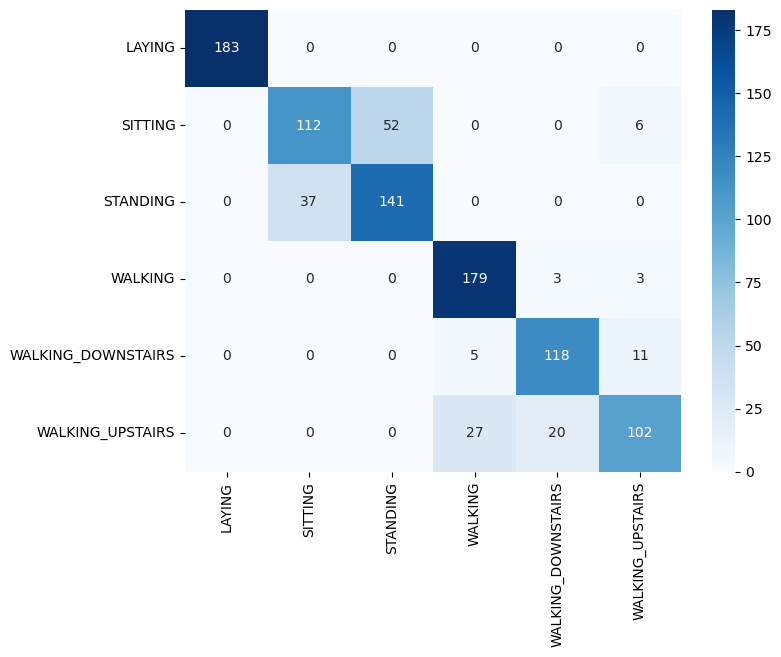

In [44]:
# sns heatmap
plt.figure(figsize=(8, 6))

Activity_labels = np.unique(y_prediction_dtc)

sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=Activity_labels, 
            yticklabels=Activity_labels)


### 5.d. RandomForestClassifier Model with Hyperparameter tuning and Cross Validation

In [45]:
parameters = {
    'n_estimators':np.arange(20, 101, 10),
    'max_depth': np.arange(2,17,2)
    
}

rfc = RandomForestClassifier()
rfc_rs = RandomizedSearchCV(rfc, param_distributions=parameters, cv=5, random_state=42)
rfc_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [46]:
y_prediction_rfc = rfc_rs.predict(X_test)

In [47]:
# accuracy score
# accuracy score
rfc_accuracy = accuracy_score(y_true= y_test, y_pred = y_prediction_rfc)
print(rfc_accuracy)

0.913913913913914


In [48]:
# confusion matrix for looking at model prediction
cm_rfc = confusion_matrix(y_test.values, y_prediction_rfc)
cm_rfc

array([[183,   0,   0,   0,   0,   0],
       [  0, 136,  34,   0,   0,   0],
       [  0,  35, 143,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   2, 130,   2],
       [  0,   0,   0,  11,   2, 136]])

<Axes: >

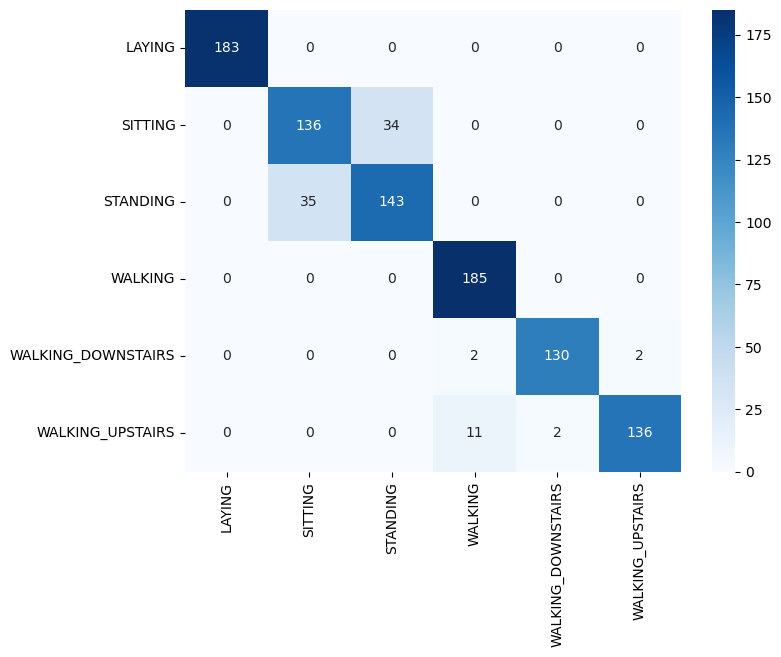

In [49]:
# sns heatmap
plt.figure(figsize=(8, 6))

Activity_labels = np.unique(y_prediction_rfc)

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=Activity_labels, 
            yticklabels=Activity_labels)
